## Brain Tumor Prediction and Treatment Analysis

### Introduction 
The National Brain Tumor Society reports that about 1 million Americans are living with a brain tumor with an estimated 90,000 more to receive a primary brain tumor diagnosis in the following year. There are more than 100 distinct types of primary brain tumors, each with its own spectrum of presentations, treatments, and outcomes. More than any other cancer, brain tumors can have lasting and life-altering physical, cognitive, and psychological impacts on a patient’s life.

Our study addresses three research questions that aim to understand characteristics of brain tumor diagnosis and treatment to help reveal (if any) patterns of brain tumor presentation, to support diagnosis and treatment. Our analysis aims to understand the frequency and distribution of brain tumors within the studied population. 

1. Does tumor size differ significantly between benign and malignant tumors?
2. What is the relationship between treatment modalities (radiation, surgery, chemotherapy) and patient survival rates?
3. Does the first symptom presented predict the stage of the tumor at its discovery?

The dataset utilized in this analysis was retrieved from Kaggle https://www.kaggle.com/datasets/miadul/brain-tumor-dataset. The data consists of simulated medical repositories comprising of 20,000 synthetic patient records. While the data is simulated, its breadth reflects a variety of medical scenarios, incorporating diverse patient demographics, tumor attributes, and clinical outcomes.

### Importing Packages 

In [1]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd
import statistics
import datetime
import seaborn as sns
%matplotlib inline

### Data wrangling - Refining, Grouping, and Shaping for Analysis
To prepare the data for analysis, the following steps were performed: 
- Rounded numbers in "Tumor_Size" column, for ease of mathematical manipulation   
- Created a smaller dataframe "brain_tumor_dataset_3" containing variables of interest 
- Converted MRI results to 0 and 1 (Negative and Positive) 
- Converted "Stage" to integer values (1, 2, 3, 4) 
- Converted "Gender" to 1 and 2 (Male and Female)
- Converted the three treatment columns (Radiation_Treatment, Surgery_Performed, and Chemotherapy) to 0 and 1 (No/Yes)

The relevant columns used in the analysis include: 
1. Gender: Gender of the patient (Male/Female).
2. Tumor_Type: Type of tumor (Benign/Malignant).
3. Tumor_Size: Size of the tumor in centimeters.
4. Stage: The stage of the tumor (I, II, III, IV).
5. Symptom_1: The first symptom observed (e.g., Headache, Seizures).
6. Symptom_2: The second symptom observed.
7. Symptom_3: The third symptom observed.
8. Radiation_Treatment: Whether radiation treatment was administered (Yes/No).
9. Surgery_Performed: Whether surgery was performed (Yes/No).
10. Chemotherapy: Whether chemotherapy was administered (Yes/No).
11. Survival_Rate: The estimated survival rate of the patient (percentage).
12. MRI_Result: The result of the MRI scan (Positive/Negative).

### 1. Tumor Size Differentiation - Visualizing the data

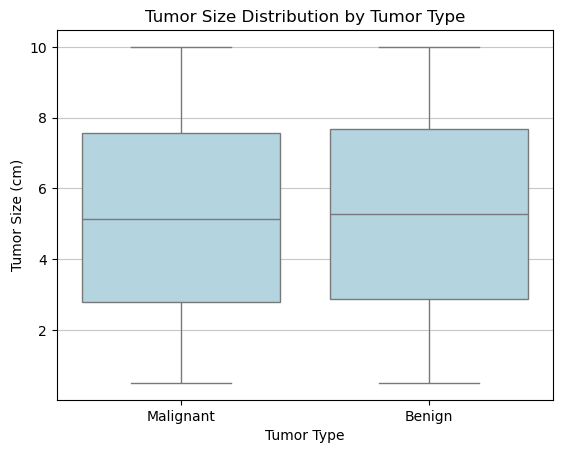

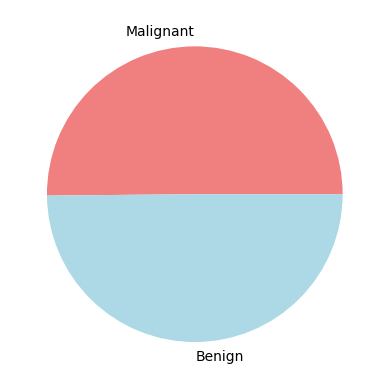

In [2]:
# Select relevant columns for question 1
brain_tumor_dataset = pd.read_csv("brain_tumor_dataset.csv")
brain_tumor_dataset_1 = brain_tumor_dataset.copy()
brain_tumor_dataset_2 = brain_tumor_dataset_1[["Tumor_Size", "Tumor_Type", "Symptom_1", "Stage", 
                                               "Radiation_Treatment", "Surgery_Performed", "Chemotherapy", 
                                               "Survival_Rate", "Gender", "MRI_Result"]].copy()
brain_tumor_dataset_3 = brain_tumor_dataset_2[["Tumor_Size", "Tumor_Type"]].copy()
brain_tumor_dataset_3.loc[:, "Tumor_Size"] = brain_tumor_dataset_3["Tumor_Size"].round(2)

# Plot box plot
sns.boxplot(x = "Tumor_Type", y = "Tumor_Size", data = brain_tumor_dataset_3, color = "lightblue")

# Add relevant details to plot
plt.title("Tumor Size Distribution by Tumor Type")
plt.xlabel("Tumor Type")
plt.ylabel("Tumor Size (cm)")
plt.grid(axis = "y", linestyle = "-", alpha = 0.7)

# Show boxplot
plt.show();

# Create a pie chart
malignant_count = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Malignant"].shape[0]
benign_count = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Benign"].shape[0]
tumor_type_counts = [malignant_count, benign_count]
tumor_type_counts
tumor_type_name = ["Malignant", "Benign"]
plt.pie(tumor_type_counts, labels = tumor_type_name, colors = ["lightcoral", "lightblue"]);

### Outliers 
In the boxplot analysis, we can see that there are no indications of outliers that fall outside of our data. Additionally, the similarity between the mean and median values from our statistical calulcations also suggests that our dataset does not contain significant outliers. A lack of outliers indicates that the dataset is fairly stable and representative of normal variations in tumor sizes for both benign and malignant categories. Thus, there is no need to remove/modify our existing datapoints in any way. 

In our pie chart, we can see that there are 10,030 malignant tumors and 9,970 benign tumors, indicating a somewhat even distribution. An even distribution between the two types without significant skewing supports the data's robustness and lack of outliers that could potentially skew the distribution. This robustness is crucial for our analysis for this question. 

### 2. Relationship between Treatment Modalities and Patient Survival Rates - Visualizing the data

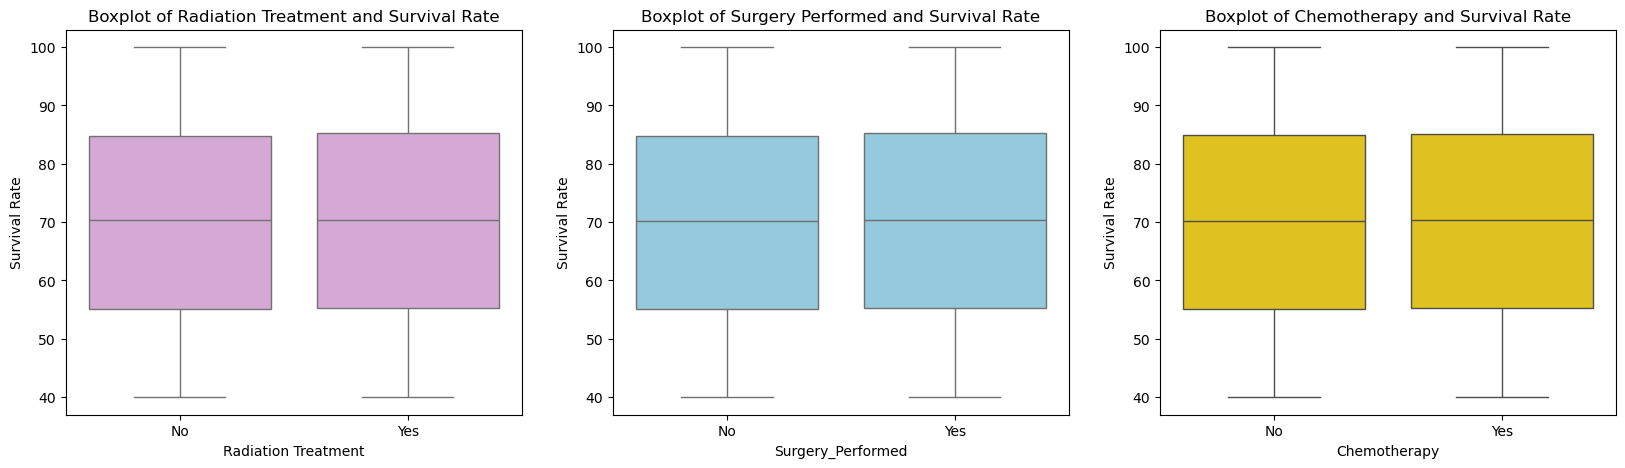

In [3]:
# Select relevant columns for question 2
brain_tumor_dataset = pd.read_csv("brain_tumor_dataset.csv")
brain_tumor_dataset_1 = brain_tumor_dataset.copy()
brain_tumor_dataset_2 = brain_tumor_dataset_1[["Tumor_Size", "Tumor_Type", "Symptom_1", "Stage",
                                               "Radiation_Treatment", "Surgery_Performed", "Chemotherapy", 
                                               "Survival_Rate", "Gender", "MRI_Result"]].copy()
brain_tumor_dataset_4 = brain_tumor_dataset_2[["Radiation_Treatment","Surgery_Performed", "Chemotherapy", "Survival_Rate"]].copy()
brain_tumor_dataset_4.loc[:, "Survival_Rate"] = brain_tumor_dataset_4["Survival_Rate"].round(2)

#Create boxplot for each treatment type
plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1);
sns.boxplot(data = brain_tumor_dataset_4, x = "Radiation_Treatment", y = "Survival_Rate", color = "plum");
plt.xlabel("Radiation Treatment");
plt.ylabel("Survival Rate");
plt.title("Boxplot of Radiation Treatment and Survival Rate");

plt.subplot(1, 3, 2);
sns.boxplot(data = brain_tumor_dataset_4, x = "Surgery_Performed", y = "Survival_Rate", color = "skyblue");
plt.xlabel("Surgery_Performed");
plt.ylabel("Survival Rate");
plt.title("Boxplot of Surgery Performed and Survival Rate");

plt.subplot(1, 3, 3);
sns.boxplot(data = brain_tumor_dataset_4, x = "Chemotherapy", y = "Survival_Rate", color = "gold");
plt.xlabel("Chemotherapy");
plt.ylabel("Survival Rate");
plt.title("Boxplot of Chemotherapy and Survival Rate");


### 3. Relationship Between First Symptom and Stage - Visualizing the data

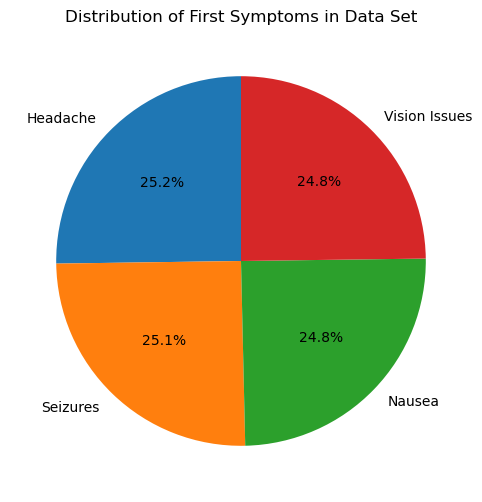

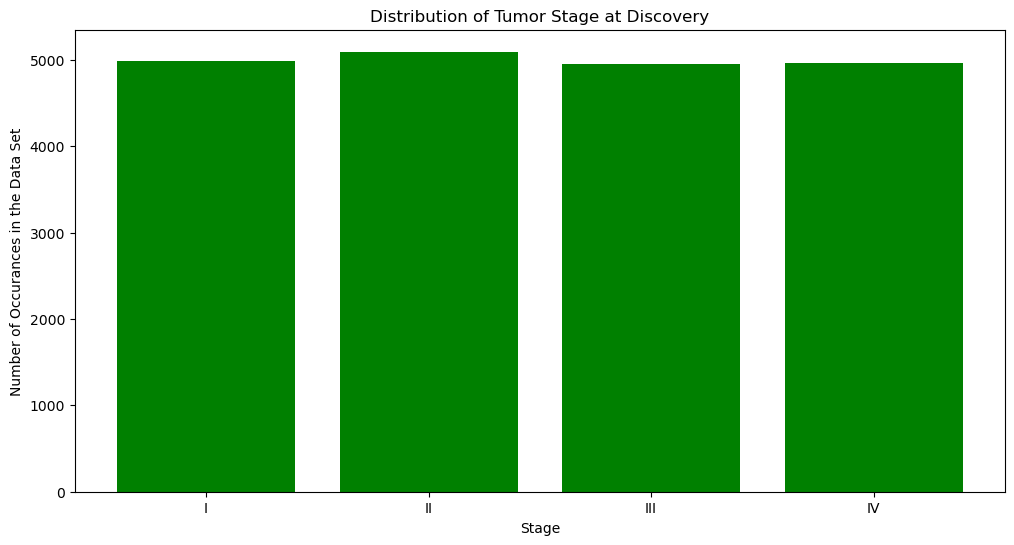

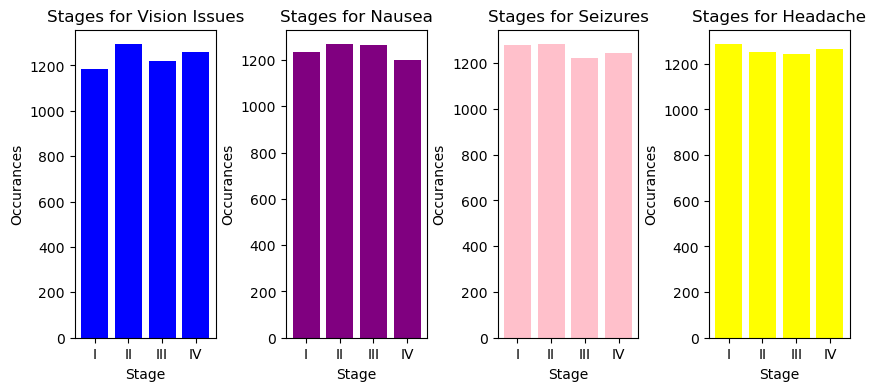

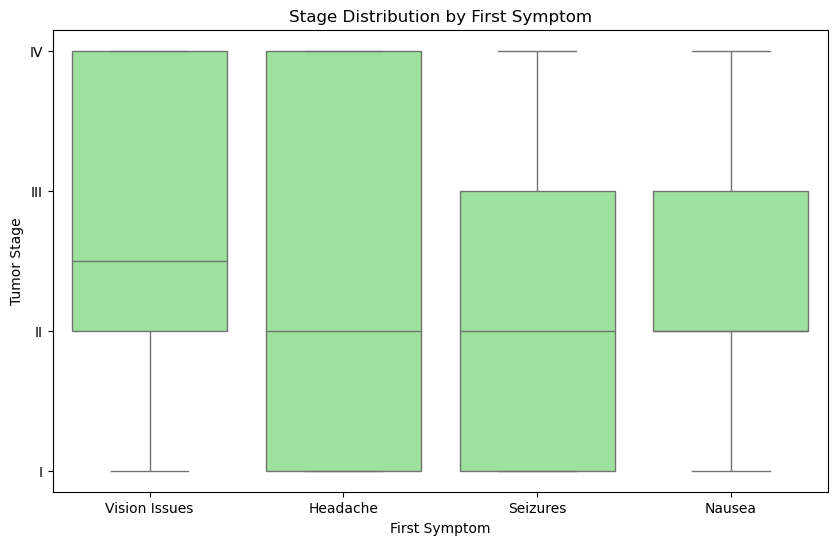

In [4]:
# Select relevant columns for question 1
brain_tumor_dataset = pd.read_csv("brain_tumor_dataset.csv")
brain_tumor_dataset_1 = brain_tumor_dataset.copy()
brain_tumor_dataset_2 = brain_tumor_dataset_1[["Tumor_Size", "Tumor_Type", "Symptom_1", "Stage",
                                               "Radiation_Treatment", "Surgery_Performed", "Chemotherapy",
                                               "Survival_Rate", "Gender", "MRI_Result"]].copy()
brain_tumor_dataset_5 = brain_tumor_dataset_2[["Symptom_1", "Stage"]].copy()

# Plot symptom distribution pie chart
symptom1_count = brain_tumor_dataset_5["Symptom_1"].value_counts()
plt.figure(figsize = (12,6));
plt.pie(symptom1_count, labels=symptom1_count.index, startangle=90, autopct="%1.1f%%");
plt.title("Distribution of First Symptoms in Data Set");
plt.show();

# Plot discovery stage distribution bar graph
stage_count = brain_tumor_dataset_5["Stage"].value_counts()
correct_order = ["I", "II", "III", "IV"]
stage_count = stage_count[correct_order]
plt.figure(figsize = (12,6));
plt.bar(stage_count.index, stage_count, color="green");
plt.title("Distribution of Tumor Stage at Discovery");
plt.xlabel("Stage");
plt.ylabel("Number of Occurances in the Data Set");
plt.show();

# Plot distribution of tumor stages for each first symptom
vision_issues_stage = brain_tumor_dataset_5[brain_tumor_dataset_5["Symptom_1"] == "Vision Issues"]
nausea_stage = brain_tumor_dataset_5[brain_tumor_dataset_5["Symptom_1"] == "Nausea"]
seizures_stage = brain_tumor_dataset_5[brain_tumor_dataset_5["Symptom_1"] == "Seizures"]
headache_stage = brain_tumor_dataset_5[brain_tumor_dataset_5["Symptom_1"] == "Headache"]


vision_stage_count = vision_issues_stage['Stage'].value_counts().sort_index()
nausea_stage_count = nausea_stage['Stage'].value_counts().sort_index()
seizures_stage_count = seizures_stage['Stage'].value_counts().sort_index()
headache_stage_count = headache_stage['Stage'].value_counts().sort_index()

fig, axes = plt.subplots(1,4,figsize=(10,4));


axes[0].bar(vision_stage_count.index, vision_stage_count, color="blue");
axes[0].set_title("Stages for Vision Issues");
axes[0].set_xlabel("Stage");
axes[0].set_ylabel("Occurances");


axes[1].bar(nausea_stage_count.index, nausea_stage_count, color="purple");
axes[1].set_title("Stages for Nausea");
axes[1].set_xlabel("Stage");
axes[1].set_ylabel("Occurances");


axes[2].bar(seizures_stage_count.index, seizures_stage_count, color="pink");
axes[2].set_title("Stages for Seizures");
axes[2].set_xlabel("Stage");
axes[2].set_ylabel("Occurances");


axes[3].bar(headache_stage_count.index, headache_stage_count, color="yellow");
axes[3].set_title("Stages for Headache");
axes[3].set_xlabel("Stage");
axes[3].set_ylabel("Occurances");

plt.subplots_adjust(wspace=0.5);

# Visualize this distribution with a boxplot
correct_order_2 = ["IV", "III", "II", "I"]
brain_tumor_dataset_5["Stage"] = pd.Categorical(brain_tumor_dataset_5["Stage"], categories=correct_order_2, ordered=True)
plt.figure(figsize = (10,6));
sns.boxplot(x="Symptom_1", y="Stage", data= brain_tumor_dataset_5, color="lightgreen");
plt.title("Stage Distribution by First Symptom");
plt.xlabel("First Symptom");
plt.ylabel("Tumor Stage");


#### Descriptive Statistics 



### 1. Tumor Size Differentiation - Analysis



In [5]:
# Malignant 
malignant_tumor_sizes = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Malignant"]["Tumor_Size"]
tumor_sizem_Q1 = np.percentile(malignant_tumor_sizes, 25)
tumor_sizem_Q3 = np.percentile(malignant_tumor_sizes, 75)

# Benign
benign_tumor_sizes = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Benign"]["Tumor_Size"]
tumor_sizeb_Q1 = np.percentile(benign_tumor_sizes, 25)
tumor_sizeb_Q3 = np.percentile(benign_tumor_sizes, 75)

print("Mean B =", np.mean(benign_tumor_sizes), "Median B =", np.median(benign_tumor_sizes))
print("Q1 B =", tumor_sizeb_Q1, "Q3 M =", tumor_sizeb_Q3)

print("Mean M =", np.mean(malignant_tumor_sizes), "Median M =", np.median(malignant_tumor_sizes))
print("Q1 M =", tumor_sizem_Q1, "Q3 M =", tumor_sizem_Q3)

Mean B = 5.276205616850552 Median B = 5.27
Q1 B = 2.88 Q3 M = 7.68
Mean M = 5.197162512462613 Median M = 5.14
Q1 M = 2.8 Q3 M = 7.58


### 2. Relationship between Treatment Modalities and Patient Survival Rates - Analysis



In [6]:
brain_tumor_dataset_6 = np.round(brain_tumor_dataset_4.groupby(["Radiation_Treatment", 
                                                       "Surgery_Performed", 
                                                       "Chemotherapy"]).agg(mean_survival_rate = ("Survival_Rate", "mean"), 
                                                        median_survival_rate = ("Survival_Rate", "median"), 
                                                        max_survival_rate = ("Survival_Rate", "max"),
                                                        min_survival_rate = ("Survival_Rate", "min")).reset_index(), 2) 

patients_with_radiation = brain_tumor_dataset_6[
    (brain_tumor_dataset_6["Radiation_Treatment"] == "Yes") &
    (brain_tumor_dataset_6["Surgery_Performed"] == "No") & 
    (brain_tumor_dataset_6["Chemotherapy"] == "No")]
display(patients_with_radiation)

patients_with_surgery = brain_tumor_dataset_6[
    (brain_tumor_dataset_6["Radiation_Treatment"] == "No") &
    (brain_tumor_dataset_6["Surgery_Performed"] == "Yes") & 
    (brain_tumor_dataset_6["Chemotherapy"] == "No")]
display(patients_with_surgery)

patients_with_chemotherapy = brain_tumor_dataset_6[
    (brain_tumor_dataset_6["Radiation_Treatment"] == "No") &
    (brain_tumor_dataset_6["Surgery_Performed"] == "No") & 
    (brain_tumor_dataset_6["Chemotherapy"] == "Yes")]
display(patients_with_chemotherapy)

patients_without_treatment = brain_tumor_dataset_6[
    (brain_tumor_dataset_6["Radiation_Treatment"] == "No") &
    (brain_tumor_dataset_6["Surgery_Performed"] == "No") & 
    (brain_tumor_dataset_6["Chemotherapy"] == "No")]
display(patients_without_treatment)

,Radiation_Treatment,Surgery_Performed,Chemotherapy,mean_survival_rate,median_survival_rate,max_survival_rate,min_survival_rate
4,Yes,No,No,69.81,69.9,100.0,40.0


,Radiation_Treatment,Surgery_Performed,Chemotherapy,mean_survival_rate,median_survival_rate,max_survival_rate,min_survival_rate
2,No,Yes,No,70.51,70.54,99.9,40.06


,Radiation_Treatment,Surgery_Performed,Chemotherapy,mean_survival_rate,median_survival_rate,max_survival_rate,min_survival_rate
1,No,No,Yes,69.68,70.05,99.99,40.01


,Radiation_Treatment,Surgery_Performed,Chemotherapy,mean_survival_rate,median_survival_rate,max_survival_rate,min_survival_rate
0,No,No,No,69.85,69.67,99.96,40.0


### 3. Relationship Between First Symptom and Stage - Analysis



In [7]:
# Descriptive Statistics
stage_map = {"I": 1, "II": 2, "III": 3, "IV": 4}
brain_tumor_dataset_5["Stage_numeric"] = brain_tumor_dataset_5["Stage"].map(stage_map)
brain_tumor_dataset_5["Stage_numeric"] = pd.to_numeric(brain_tumor_dataset_5["Stage_numeric"])

vision_issues_stage_2 = brain_tumor_dataset_5["Stage_numeric"][brain_tumor_dataset_5["Symptom_1"] == "Vision Issues"]
nausea_stage_2 = brain_tumor_dataset_5["Stage_numeric"][brain_tumor_dataset_5["Symptom_1"] == "Nausea"]
seizures_stage_2 = brain_tumor_dataset_5["Stage_numeric"][brain_tumor_dataset_5["Symptom_1"] == "Seizures"]
headache_stage_2 = brain_tumor_dataset_5["Stage_numeric"][brain_tumor_dataset_5["Symptom_1"] == "Headache"]


def stage_statistics(group):
    mean_stage = group.mean()
    median_stage = group.median()
    Q1_stage = group.quantile(0.25)
    Q3_stage = group.quantile(0.75)
    return pd.Series({"Mean": mean_stage, "Median": median_stage, "Q1": Q1_stage, "Q3": Q3_stage})

vision_stage_stats = stage_statistics(vision_issues_stage_2)
nausea_stage_stats = stage_statistics(nausea_stage_2)
seizures_stage_stats = stage_statistics(seizures_stage_2)
headache_stage_stats = stage_statistics(headache_stage_2)

stage_stats_df = pd.DataFrame({
    "Vision Stage Stats": vision_stage_stats,
    "Nausea Stage Stats": nausea_stage_stats,
    "Seizures Stage Stats": seizures_stage_stats,
    "Headache Stage Stats": headache_stage_stats
})

display(stage_stats_df)

,Vision Stage Stats,Nausea Stage Stats,Seizures Stage Stats,Headache Stage Stats
Mean,2.514724,2.489032,2.483294,2.493756
Median,2.500000,2.000000,2.000000,2.000000
Q1,2.000000,2.000000,1.000000,1.000000
Q3,4.000000,3.000000,3.000000,4.000000


## Analyses: subtitle about the analyses/models you are using 

Include other analyses here, including extracting insights using pandas and also potentially including hypothesis tests and machine learning methods in the final version of your project once we have disucssed these methods in class. 


### Outliers 
In the boxplot analysis, we can see that there are no indications of outliers that fall outside of our data. Additionally, the similarity between the mean and median values from our statistical calculations also suggests that our dataset does not contain significant outliers. A lack of outliers indicates that the dataset is fairly stable and representative of normal variations in tumor sizes for both benign and malignant categories. Thus, there is no need to remove/modify our existing datapoints in any way. 

In our pie chart, we can see that there are 10,030 malignant tumors and 9,970 benign tumors, indicating a somewhat even distribution. An even distribution between the two types without significant skewing supports the data's robustness and lack of outliers that could potentially skew the distribution. This robustness is crucial for our analysis for this question. 

### Question 2- Grouped Statistics
In the boxplot analysis, all three boxplots comparing the different treatment modalities to survival rates looked comparable, with no outliers skewing the data. The spread of the data for each treatment modality looked comparable with similar medians, as indicated by the line within the box. Thus, there was no need to do additional data cleaning to create a more robust dataset. Comparing the mean, median, max, and min of the survival rate with the treatment and without the treatment, there was no apparent trend suggesting that treatment was effective. 

### Question 3 - Outliers
In the bar graph subplots(second set of bar graphs), as well as the boxplot analysis, we can see that this is no indication of outliers that fall outside of and can distort analysis done on our data. Since both of the variables we considered (Tumor Stage and First Symptom) were categorical, we were searching for combinations of these variables that had extremely low frequencies. Since we didn't find any of these combinations, we did not have any outliers to remove from the data. 

When we converted the stages to numerical values in order to do descriptive statistics, we found that the stage value mean and medians for each of the first symptomns were very similar, indicating our dataset didn't contain significant outliers (or extremely uncommon combinations of first symptom and stage).

The initial pie chart of first symptoms also shows us that each of the symptoms are equally as common, so we did not need to remove any extremely uncommon symptoms from the data. The bar graph which presents the distribution of tumor stages in our dataset, we can also see that there are no uncommon stage datapoints, as all of the stages are similarly common. 

## Conclusions
- Question 1: Malignant brain tumors are cancerous and tend to grow quickly and aggressively, potentially spreading to other parts of the brain, while benign brain tumors are non-cancerous and typically grow slowly and don't spread. In our analysis between "Tumor_Type" and "Tumor_Size", we found that the percent difference between the mean tumor sizes of benign and malignant tumors is approximately 1.51%. This indicates a very slight difference in the average size of tumors between the two types. The percent difference between the median tumor sizes is approximately 2.50%, also suggesting a minor difference in the central tendency of tumor sizes for the two groups. This suggests to us that tumor type alone is not representative of the size of the tumor in the brain, despite this difference in how they manifest in the brain.  

- Question 2: There are many treatment options available for brain tumors of various sizes and severities. Analyzing the relationship between treatment modalities and patient survival rates, we found that the mean survival rates of patients who had received radiation treatment, surgery, or chemotherapy were comparable (69.81%, 70.51%, 69.68%, respectively). The range of the survival rates also appears similar, with the lowest survival rate being 40% and the highest survival rate being near 100%. These results elucidate that no one treatment modality is more effective in treating brain tumors to increase survival outcomes in patients. Interestingly, patients who did not receive any treatment displayed similar results, suggesting that survival rates may be dependent on other factors such as tumor size and severity.

- Question 3: The stages (I-IV) of tumors are indicators of the severity of tumor or disease and the level to which it has metastisized. In our analysis between "Symptom_1" and "Stage", we investigated whether there was a relationship between the first presenting symptom and the stage of the tumor in the data set. We found that each of the first symptoms (Vision Issues, Nausea, Seizures, Headache) presented a similar distribution of tumor stages in the data set, with no significant differences between occurances of each stage across the four symptom types. After converting the stages to numerical values and doing descriptive statistics, we found that the mean stage values for each symptom type were all within 1.27% of each other. In addition, the median stage value for each symptom type was within the range 2.0 - 2.5, falling close to the average median value (2.4952015). This indicates that there was very little difference in the occurence of the different stages based on what symptom was presented first. These findings suggest to us that there is no signficant relationship between first symptom presented and the stage, meaning that they are not predictive of each other. 

## Reflection
  

Write a few paragraphs describing what went well with this project and what was more difficult. Also describe any additional analyses you tried that you did not end up including in this report, and approximately how much time you spend working the project. 

Finally, please go to Canvas and answer a few questions related to how the project went.

As three neuroscience majors, we were excited to have the chance to analyze this dataset related to brain tumors as they are an interest we all have in common... proved to be the most difficult. We spent approximately XX hours on our project.

## Appendix 


In [8]:
# Loading dataset 
brain_tumor_dataset = pd.read_csv("brain_tumor_dataset.csv")
brain_tumor_dataset.head()

# Creating new dataset with relevant variables 
brain_tumor_dataset_1 = brain_tumor_dataset.copy()
brain_tumor_dataset_2 = brain_tumor_dataset_1[["Tumor_Size", "Tumor_Type", "Symptom_1", "Stage",
                                               "Radiation_Treatment", "Surgery_Performed", "Chemotherapy",
                                               "Survival_Rate", "Gender", "MRI_Result"]].copy()
brain_tumor_dataset_2.head()
brain_tumor_dataset_2.loc[:, "Tumor_Size"] = brain_tumor_dataset_2["Tumor_Size"].round(2)

#Display(brain_tumor_dataset_3.reset_index())
brain_tumor_dataset_2.loc[:, "Stage"] = brain_tumor_dataset_2["Stage"].replace({"I": 1, "II": 2, "III": 3, "IV": 4}).astype(int)
brain_tumor_dataset_2.loc[:, "Gender"] = brain_tumor_dataset_2["Gender"].replace({"Male": 1, "Female": 2}).astype(int)
brain_tumor_dataset_2.loc[:, "MRI_Result"] = brain_tumor_dataset_2["MRI_Result"].replace({"Negative": 0, "Positive": 1}).astype(int)
brain_tumor_dataset_2.loc[:, "Radiation_Treatment"] = brain_tumor_dataset_2["Radiation_Treatment"].replace({"No": 0, "Yes": 1}).astype(int)
brain_tumor_dataset_2.loc[:, "Surgery_Performed"] = brain_tumor_dataset_2["Surgery_Performed"].replace({"No": 0, "Yes": 1}).astype(int)
brain_tumor_dataset_2.loc[:, "Chemotherapy"] = brain_tumor_dataset_2["Chemotherapy"].replace({"No": 0, "Yes": 1}).astype(int)

display(brain_tumor_dataset_2)

/tmp/ipykernel_3214811/395883483.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  brain_tumor_dataset_2.loc[:, "Stage"] = brain_tumor_dataset_2["Stage"].replace({"I": 1, "II": 2, "III": 3, "IV": 4}).astype(int)
/tmp/ipykernel_3214811/395883483.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  brain_tumor_dataset_2.loc[:, "Gender"] = brain_tumor_dataset_2["Gender"].replace({"Male": 1, "Female": 2}).astype(int)
/tmp/ipykernel_3214811/395883483.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

,Tumor_Size,Tumor_Type,Symptom_1,Stage,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Gender,MRI_Result
0,5.38,Malignant,Vision Issues,3,0,0,0,51.312579,1,1
1,4.85,Benign,Headache,2,1,1,1,46.373273,1,1
2,5.59,Benign,Vision Issues,1,0,0,0,47.072221,1,0
3,1.44,Malignant,Vision Issues,4,1,0,1,51.853634,1,0
4,2.42,Benign,Headache,1,0,0,1,54.708987,2,1
...,...,...,...,...,...,...,...,...,...,...
19995,9.61,Malignant,Seizures,3,0,0,1,58.229662,1,0
19996,1.54,Benign,Headache,3,1,1,0,77.706856,2,1
19997,3.62,Benign,Seizures,1,0,0,1,89.543803,2,1
19998,8.52,Malignant,Seizures,3,1,1,1,83.306781,1,1
